# <span style='font-family:"Times New Roman"'> <span styel=''> **>1muts SUBGROUP EXPLORATION**

## <span style='font-family:"Times New Roman"'> <span styel=''> *Emile Cohen* 
*March 2020*

**Goal:** In this notebook, we want to understand why the >1muts subgroup has a very different overall number of mutations and a different distribution of mutation Type. For that we will distinguish between the different cancer Type and try categorizing on the clonality of the samples.
    
The Notebook is divided in X parts:
   


**NB1:** In each part, you must run the cells from the begining in order to initialize the variables

**NB2:** All functions used for the plots are located in utils/custom_tools.py

---

In [13]:
%run -i '../../utils/setup_environment.ipy'
from utils.analysis_tools import *

import warnings, math
warnings.filterwarnings('ignore')
import ptitprince as pt
import IPython.display

data_path = '../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

---

In [8]:
# Loading the master
master = pd.read_pickle(data_path + 'merged_data/master_file.pkl')
master_sub = master[master['mut_cn_group'] == '>1muts']
master_sub

,Sample_Id,Tumor_Id,Patient_Id,Cancer_Type,Sample_Type,purity,ploidy,samples_per_patient,Overall Survival Status,Overall Survival (Months),MSI Score,key_1,vc_1,ccf_1,vaf_1,HGVSp_1,spot_1,key_2,vc_2,ccf_2,vaf_2,HGVSp_2,spot_2,key_3,vc_3,ccf_3,vaf_3,HGVSp_3,spot_3,key_4,vc_4,ccf_4,vaf_4,HGVSp_4,spot_4,key_5,vc_5,ccf_5,vaf_5,HGVSp_5,spot_5,tp53_count,tcn,mcn,lcn,seg_length,cn_state,cf,wgd,mutation_count,gene_count,max_vaf,exp_nb_1,exp_nb_2,exp_nb_3,exp_nb_4,exp_nb_5,cn_group,mut_cn_group,chr_comput,chr_affected,chr_loss,chr_gain,chr_cnloh,vc_group_1,vc_group_2,vc_group_3,vc_group_4,vc_group_5
109,P-0022536-T01-IM6_P-0022536-N01-IM6,P-0022536-T01-IM6,P-0022536,Glioma,Metastasis,0.621794,1.964867,1.0,DECEASED,3.255,0.14,P-0022536-T01-IM6_17_7577094_G_A,Missense_Mutation,0.961,0.298893,p.Arg282Trp,282,P-0022536-T01-IM6_17_7577120_C_T,Missense_Mutation,1.000,0.314172,p.Arg273His,273,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,80668564.0,DIPLOID,1.0,-1.0,5,4.0,0.337368,0.961389,1.010535,NaN,NaN,NaN,WILD_TYPE,>1muts,"(5, 4, 1, 0)",5,4,1,0,missense,missense,None,None,None
115,P-0001253-T01-IM3_P-0001253-N01-IM3,P-0001253-T01-IM3,P-0001253,Glioma,Primary,0.945316,3.473627,1.0,LIVING,65.096,0.78,P-0001253-T01-IM3_17_7577544_A_G,Missense_Mutation,0.899,0.424779,p.Met246Thr,246,P-0001253-T01-IM3_17_7577570_C_A,Missense_Mutation,0.844,0.399038,p.Met237Ile,237,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,41161397.0,DOUBLE LOSS AFTER,1.0,1.0,5,4.0,0.424779,0.898702,0.844243,NaN,NaN,NaN,DOUBLE LOSS AFTER,>1muts,"(20, 2, 19, 1)",20,2,19,1,missense,missense,None,None,None
229,P-0006754-T01-IM5_P-0006754-N01-IM5,P-0006754-T01-IM5,P-0006754,"Skin Cancer, Non-Melanoma",Metastasis,0.207614,1.894433,1.0,DECEASED,18.016,0.15,P-0006754-T01-IM5_17_7577539_G_A,Missense_Mutation,0.567,0.058875,p.Arg248Trp,248,P-0006754-T01-IM5_17_7579414_CC_TT,Nonsense_Mutation,1.000,0.104612,p.Trp91Ter,91,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,80668459.0,DIPLOID,1.0,-1.0,67,56.0,0.189802,0.567161,1.007756,NaN,NaN,NaN,WILD_TYPE,>1muts,"(5, 5, 0, 1)",5,5,0,1,missense,truncated,None,None,None
268,P-0028367-T01-IM6_P-0028367-N01-IM6,P-0028367-T01-IM6,P-0028367,Head and Neck Cancer,Primary,0.468725,1.896462,1.0,LIVING,23.573,0.36,P-0028367-T01-IM6_17_7578181_G_A,Missense_Mutation,0.989,0.231844,p.Pro223Leu,223,P-0028367-T01-IM6_17_7579378_G_C,Nonsense_Mutation,1.000,0.253644,p.Tyr103Ter,103,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,38397131.0,DIPLOID,1.0,-1.0,11,10.0,0.479381,0.989252,1.082273,NaN,NaN,NaN,WILD_TYPE,>1muts,"(2, 1, 1, 0)",2,1,1,0,missense,truncated,None,None,None
298,P-0013783-T01-IM5_P-0013783-N01-IM5,P-0013783-T01-IM5,P-0013783,Glioma,Primary,0.933909,2.828483,1.0,LIVING,18.937,0.67,P-0013783-T01-IM5_17_7578406_C_T,Missense_Mutation,1.000,0.494505,p.Arg175His,175,P-0013783-T01-IM5_17_7579328_T_-,Frame_Shift_Del,0.988,0.461538,p.Lys120SerfsTer3,120,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,80668431.0,DOUBLE LOSS AFTER,1.0,1.0,9,6.0,0.940000,1.059001,0.988401,NaN,NaN,NaN,DOUBLE LOSS AFTER,>1muts,"(19, 11, 8, 1)",19,11,8,1,missense,truncated,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29188,P-0050446-T01-IM6_P-0050446-N01-IM6,P-0050446-T01-IM6,P-0050446,Endometrial Cancer,Primary,0.277528,2.301555,1.0,LIVING,1.775,0.00,P-0050446-T01-IM6_17_7577105_-_GACAGGCACAAACAC,In_Frame_Ins,0.548,0.056352,p.Arg273_Cys277dup,273,P-0050446-T01-IM6_17_7578406_C_T,Missense_Mutation,0.862,0.088652,p.Arg175His,175,None,None,NaN,NaN,None,None,None,None,NaN,NaN,Non

In [9]:
print('Number of samples in the subgroup: ' + str(len(master_sub)))

Number of samples in the subgroup: 697


### Distribution per Cancer Type

,count
Cancer_Type,
Colorectal Cancer,116
Non-Small Cell Lung Cancer,110
Glioma,101
Bladder Cancer,60
"Skin Cancer, Non-Melanoma",44
Cancer of Unknown Primary,43
Head and Neck Cancer,39
Endometrial Cancer,35
Esophagogastric Cancer,28


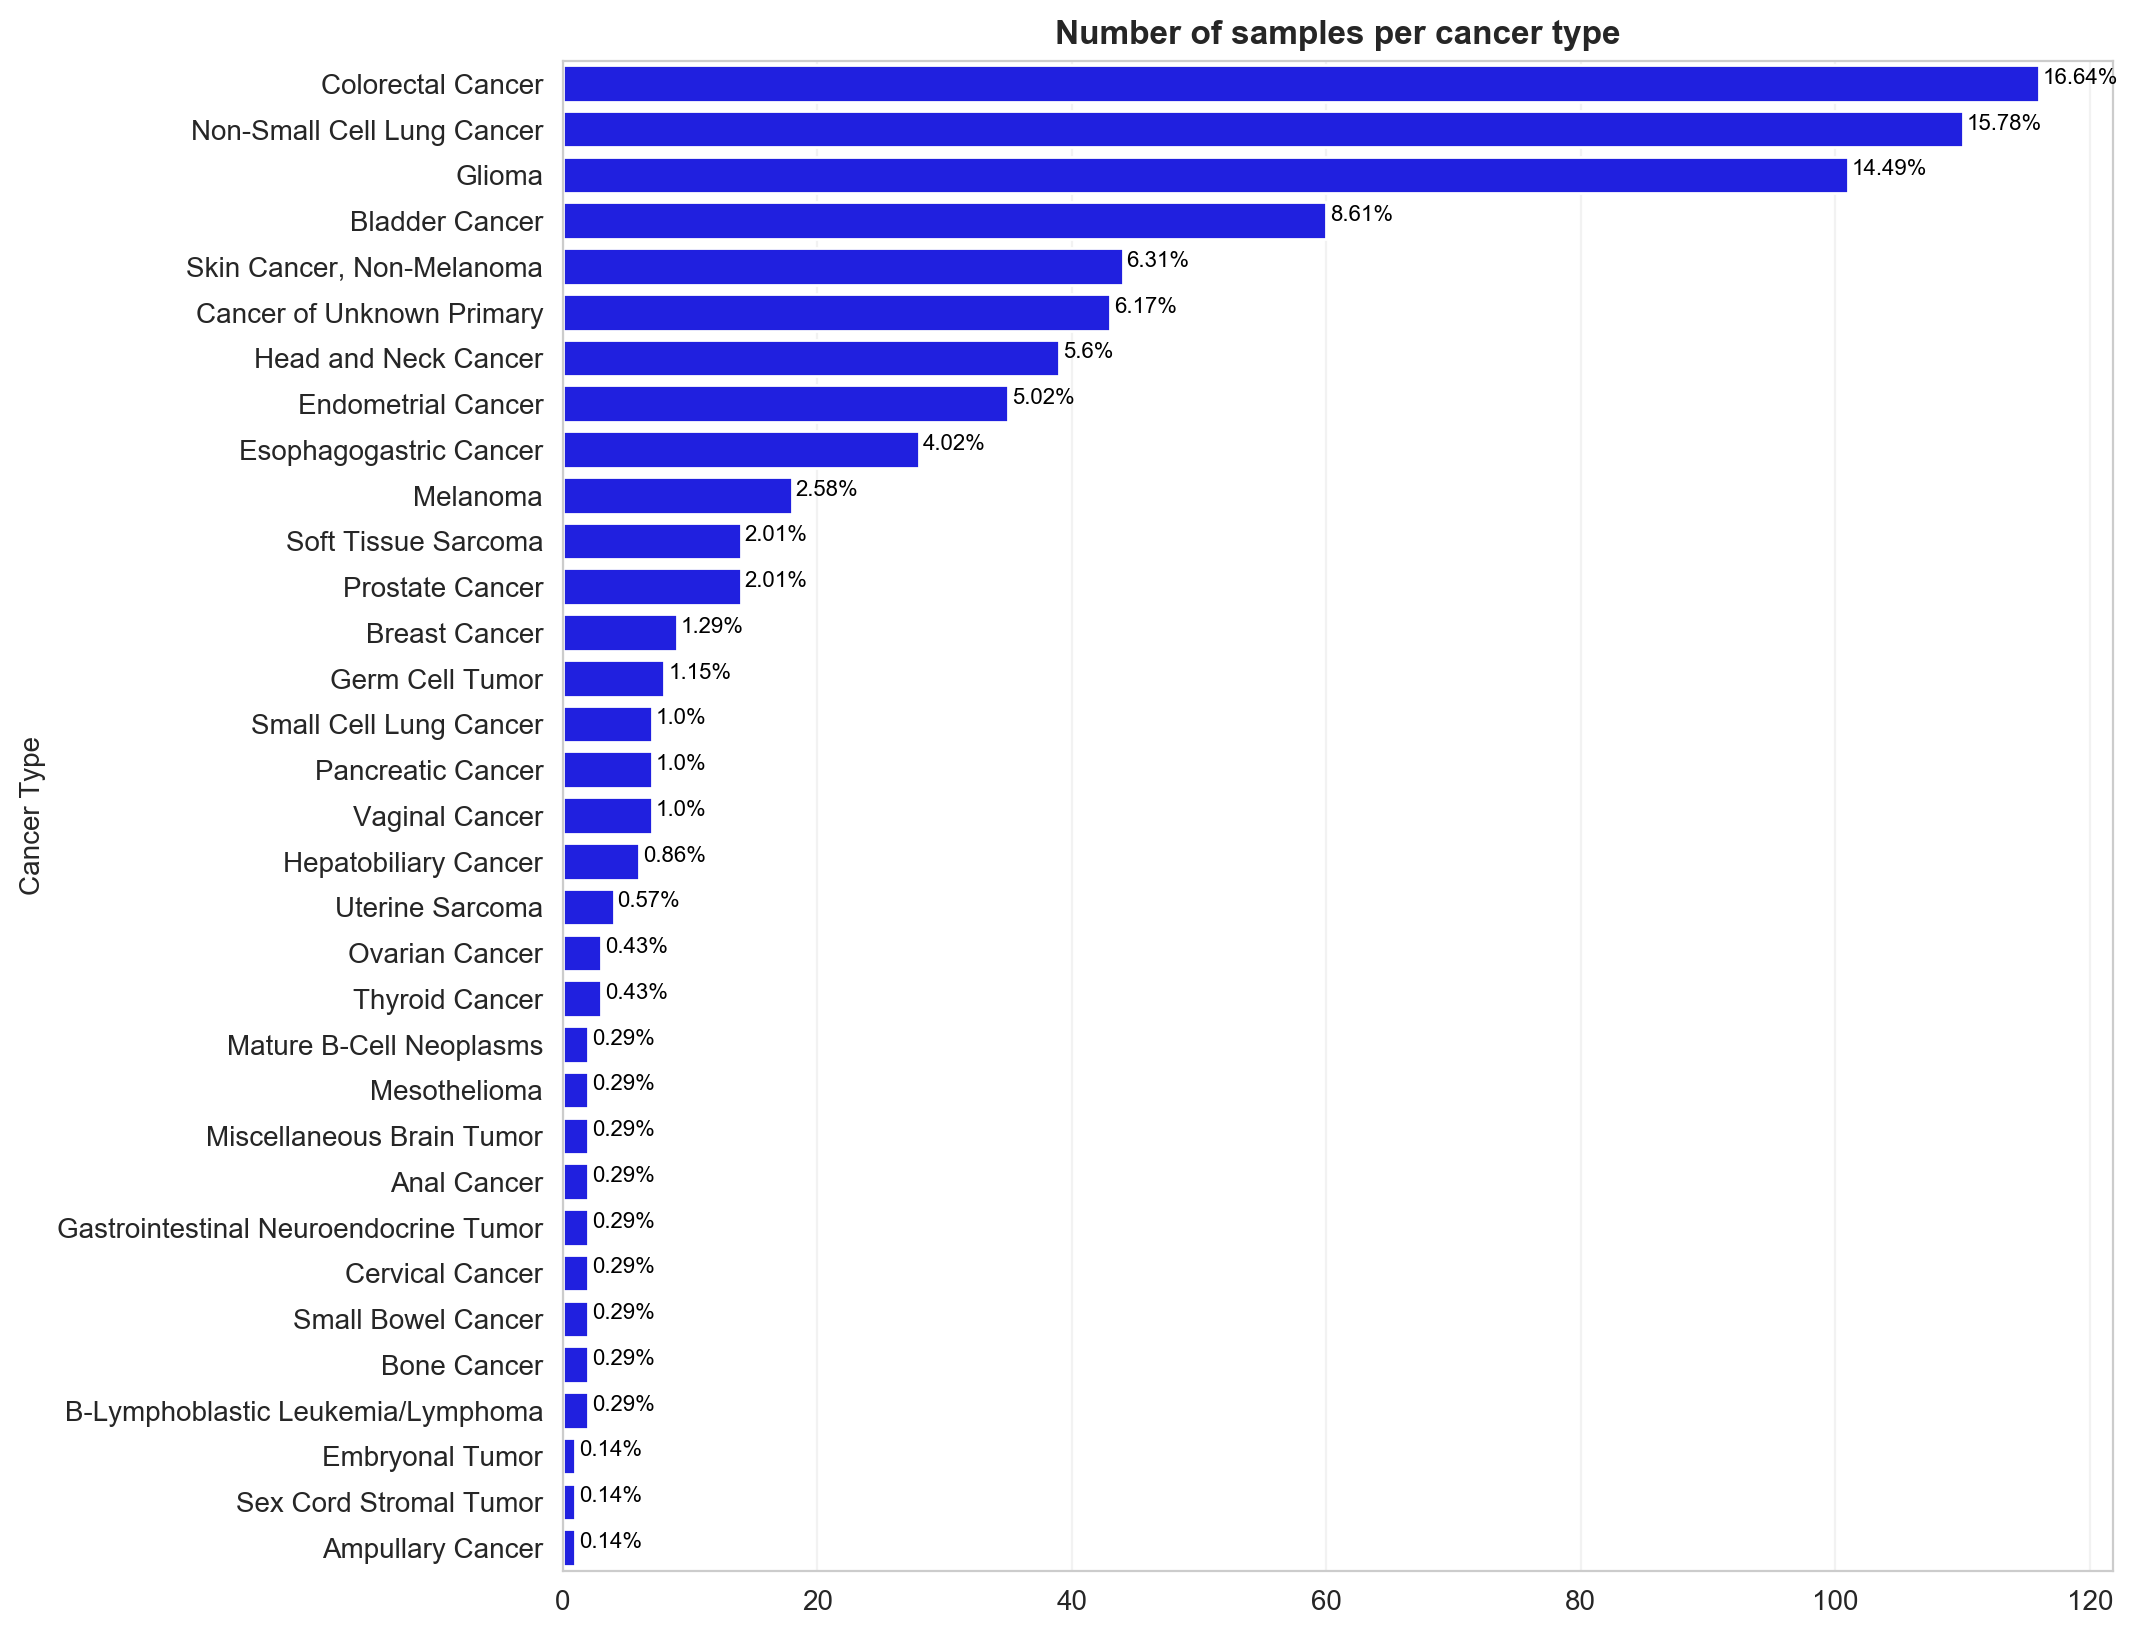

In [19]:
count = pd.DataFrame(pd.DataFrame(master_sub[['Cancer_Type']].groupby(['Cancer_Type']).size(), columns=['count']))#.groupby(['mut_cn_group','Cancer_Type']).sum()).unstack().sort_values(by=[('count',0)])
count = count[count['count']>=0]

count = count.sort_values(by=['count'], ascending=False)
display(count)

# We plot the table
get_ploth(count.index, 'count', count, 'Cancer Type', '','Number of samples per cancer type',figsize=(10,10), perc=True)

### Categorizing based on the clonality

In [104]:
data_ccf= master_sub[['ccf_1','ccf_2','ccf_3','ccf_4','ccf_5']]
max_table_ccf = pd.DataFrame(np.sort(data_ccf.fillna(0).values)[:,-2:], columns=['ccf_2nd-largest','ccf_largest'])
max_table_ccf = pd.concat([max_table_ccf, master_sub.reset_index()], axis=1)

def clonal_cond(x):
    if x.ccf_largest + x['ccf_2nd-largest'] > 1.8:
        return 'clonal'
    if x.ccf_largest + x['ccf_2nd-largest'] > 1.2:
        return 'intermediate'
    else : return 'subclonal'
    
max_table_ccf['clonality'] = max_table_ccf.apply(clonal_cond, axis=1)

get_groupby(max_table_ccf, 'clonality', 'count')

,count
clonality,
clonal,345
intermediate,276
subclonal,76


Text(0.5, 1.0, 'Mutation Count per Clonality')

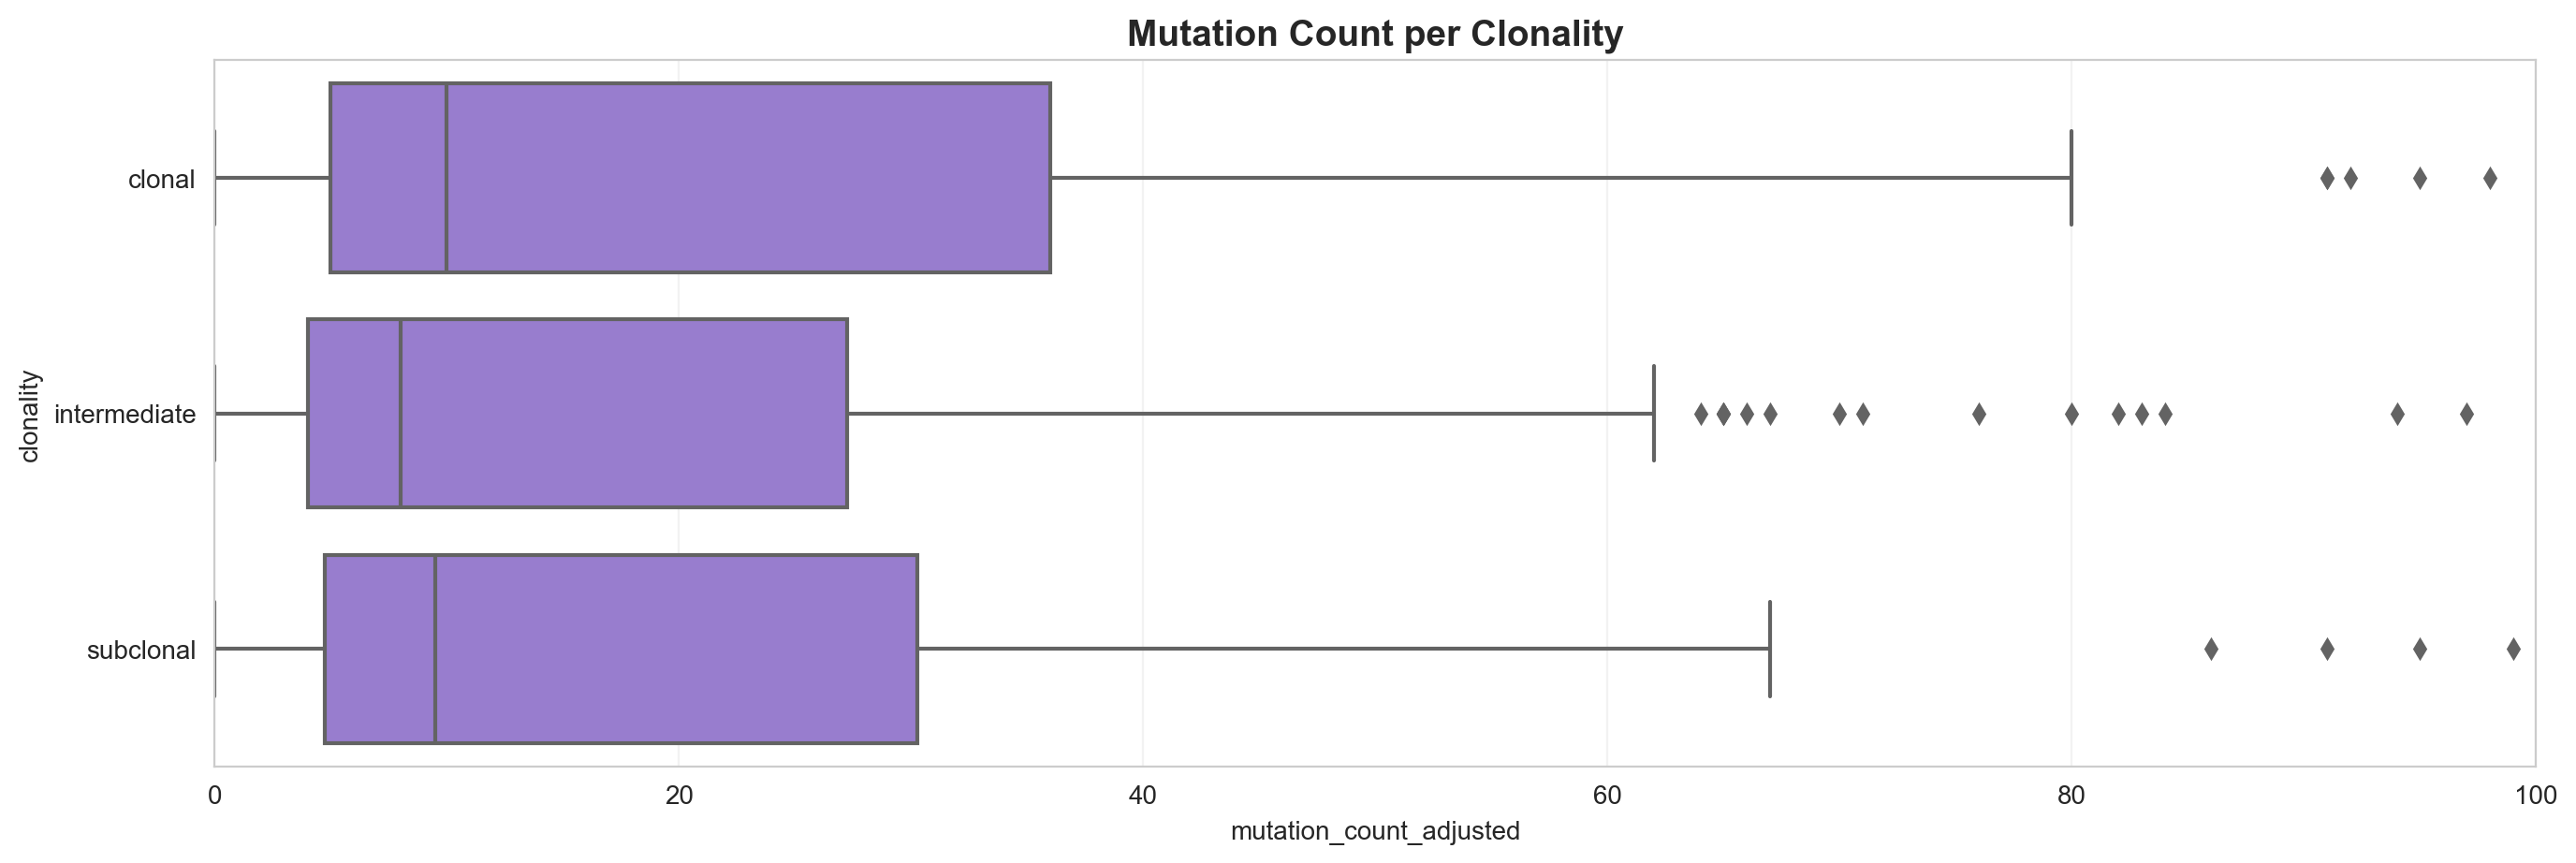

In [105]:
fig=plt.figure(figsize=(16,5))
ax1 = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)
ax1.set_xlim(0, 100)

data = max_table_ccf[['tp53_count', 'clonality', 'mutation_count','gene_count']]
data['mutation_count_adjusted'] = data['mutation_count'] - data['tp53_count']

sns.boxplot(y="clonality", x="mutation_count_adjusted",data=data,ax=ax1, dodge=False, color='mediumpurple').set_title('Mutation Count per Clonality', weight='bold', fontsize=14)

### Mutation count per Cancer Type

Text(0.5, 1.0, 'Mutation Count per Cancer Type')

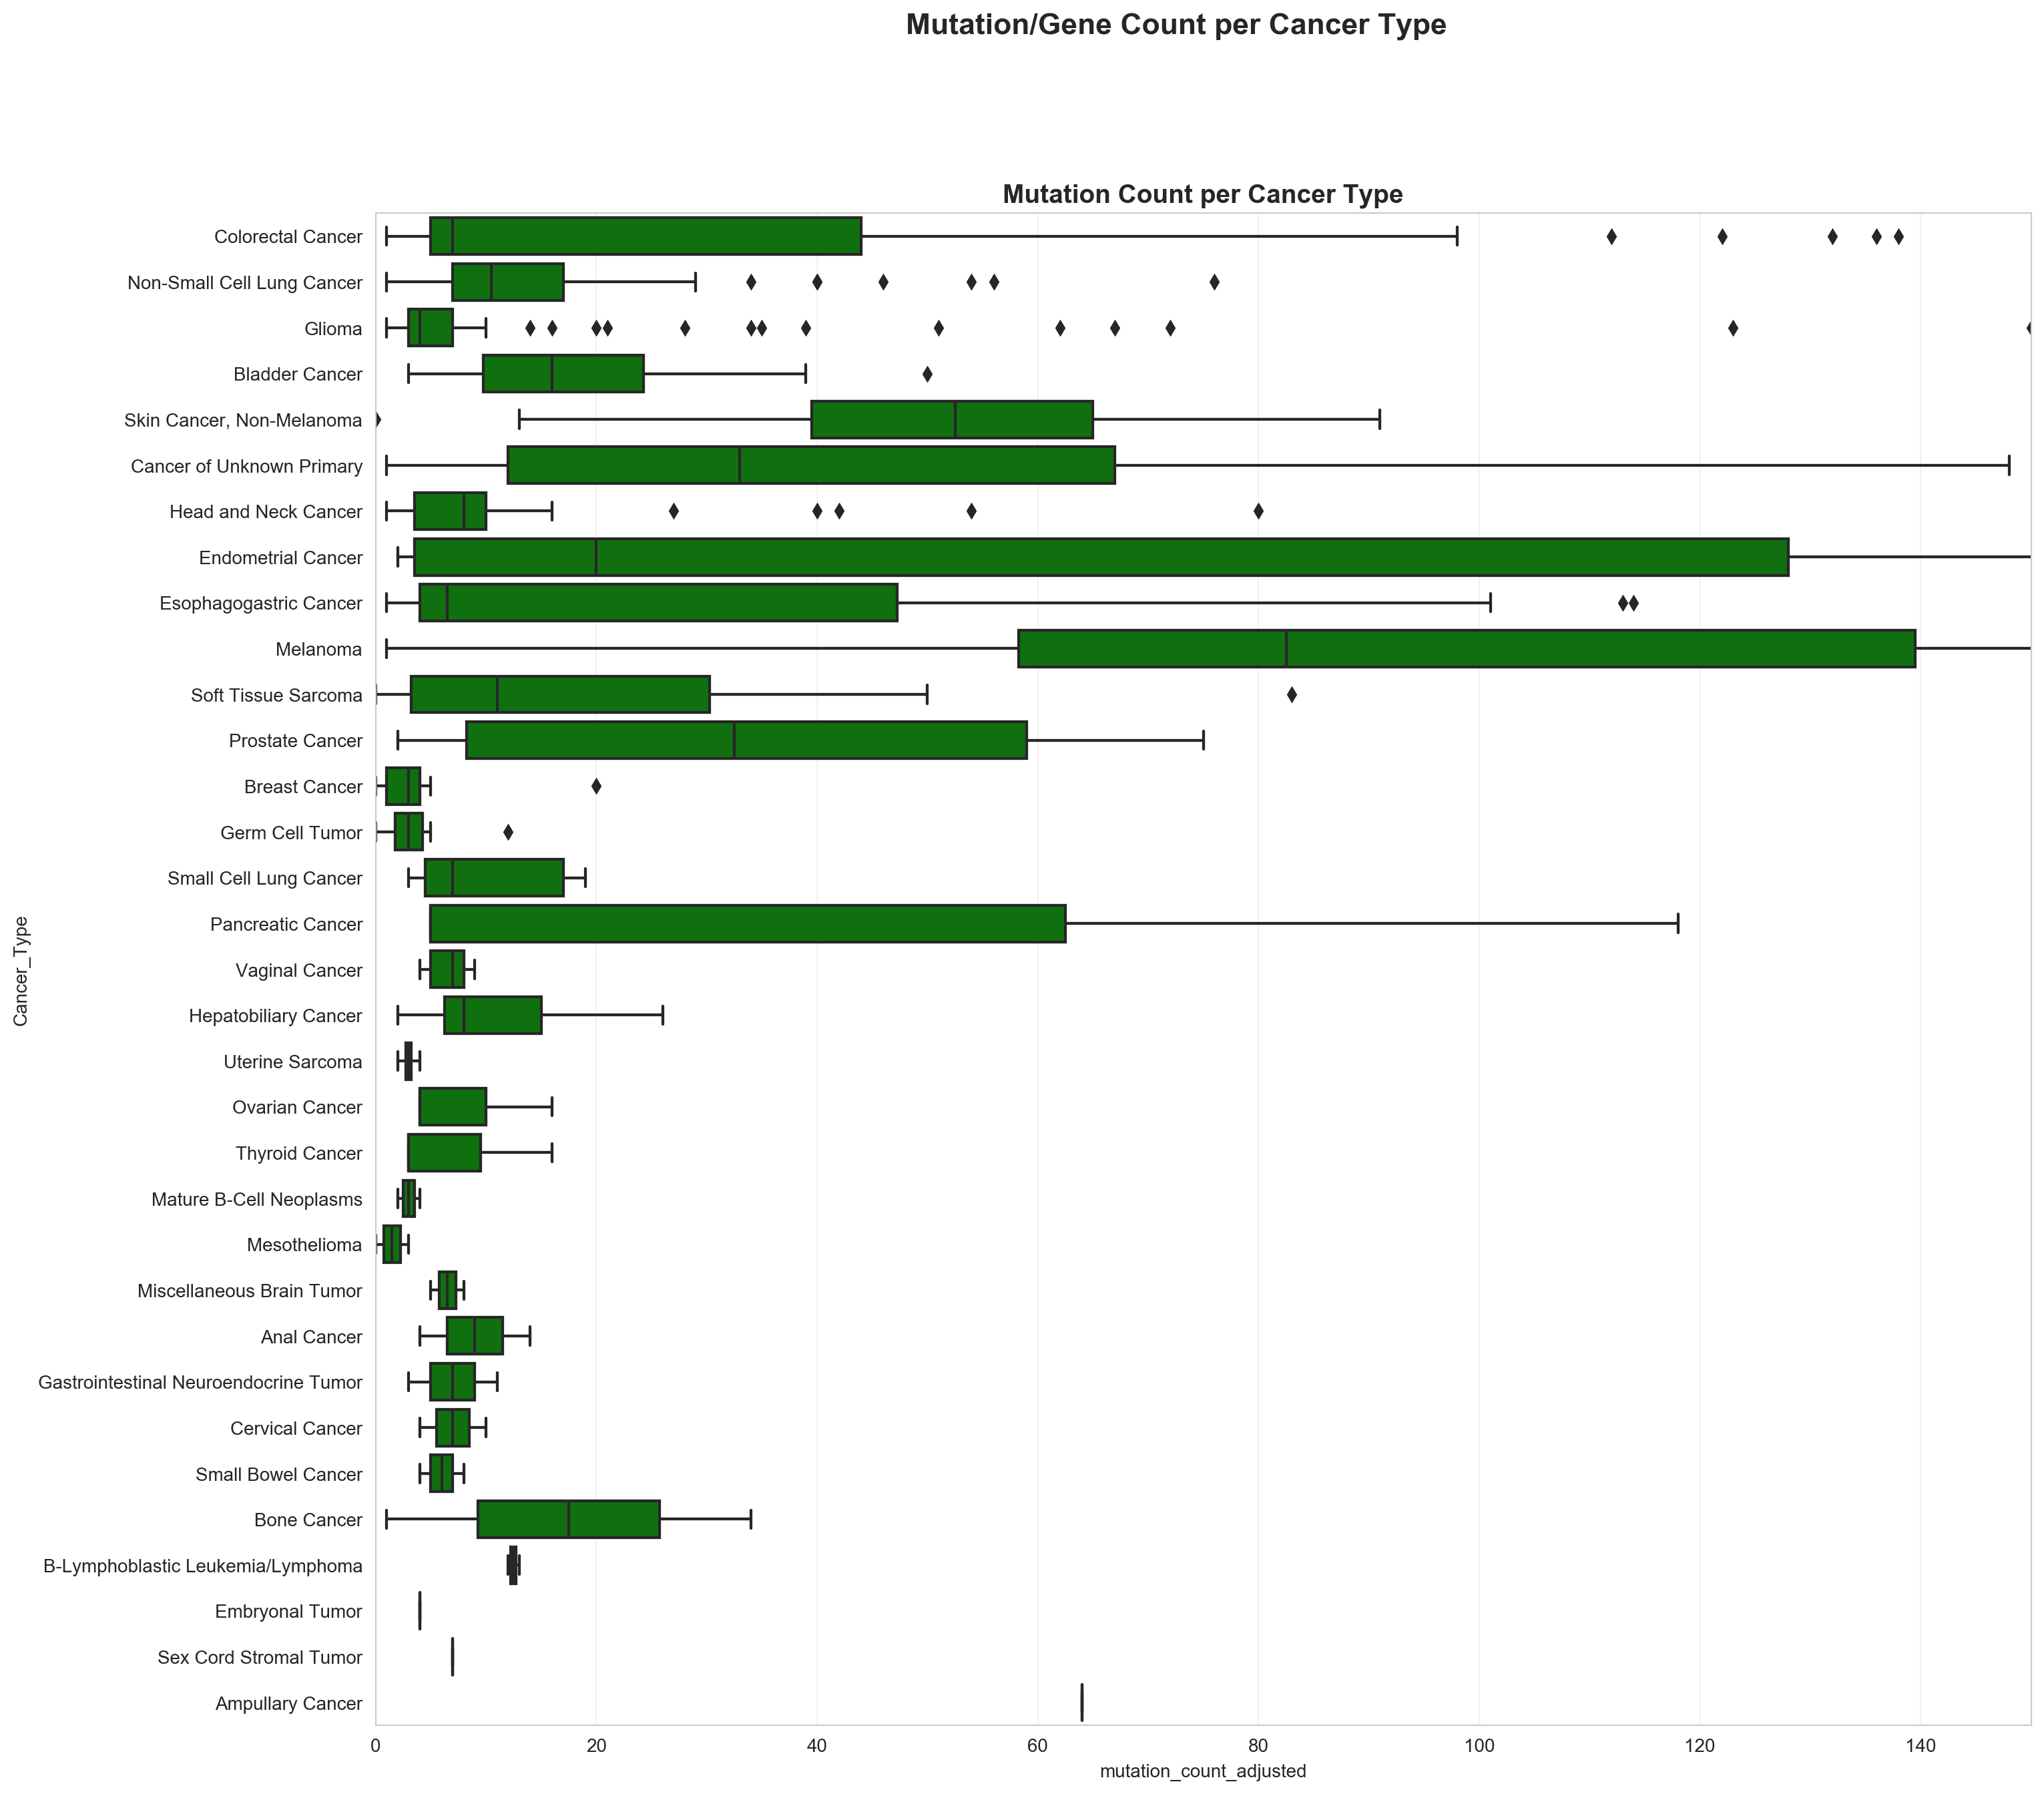

In [106]:
fig=plt.figure(figsize=(16,15))
fig.suptitle('Mutation/Gene Count per Cancer Type', fontsize=16, weight='bold')
ax1 = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)
ax1.set_xlim(0, 150)

master_sub['mutation_count_adjusted'] = master_sub['mutation_count'] - master_sub['tp53_count']

sns.boxplot(y="Cancer_Type", x="mutation_count_adjusted",data=master_sub,ax=ax1, dodge=False, color='mediumpurple', order = count.index).set_title('Mutation Count per Cancer Type', weight='bold', fontsize=14)
sns.boxplot(y="Cancer_Type", x="mutation_count_adjusted",data=max_table_ccf,ax=ax1, dodge=False, color='green', order = count.index).set_title('Mutation Count per Cancer Type', weight='bold', fontsize=14)

Text(0.5, 1.0, 'Mutation Count per Cancer Type')

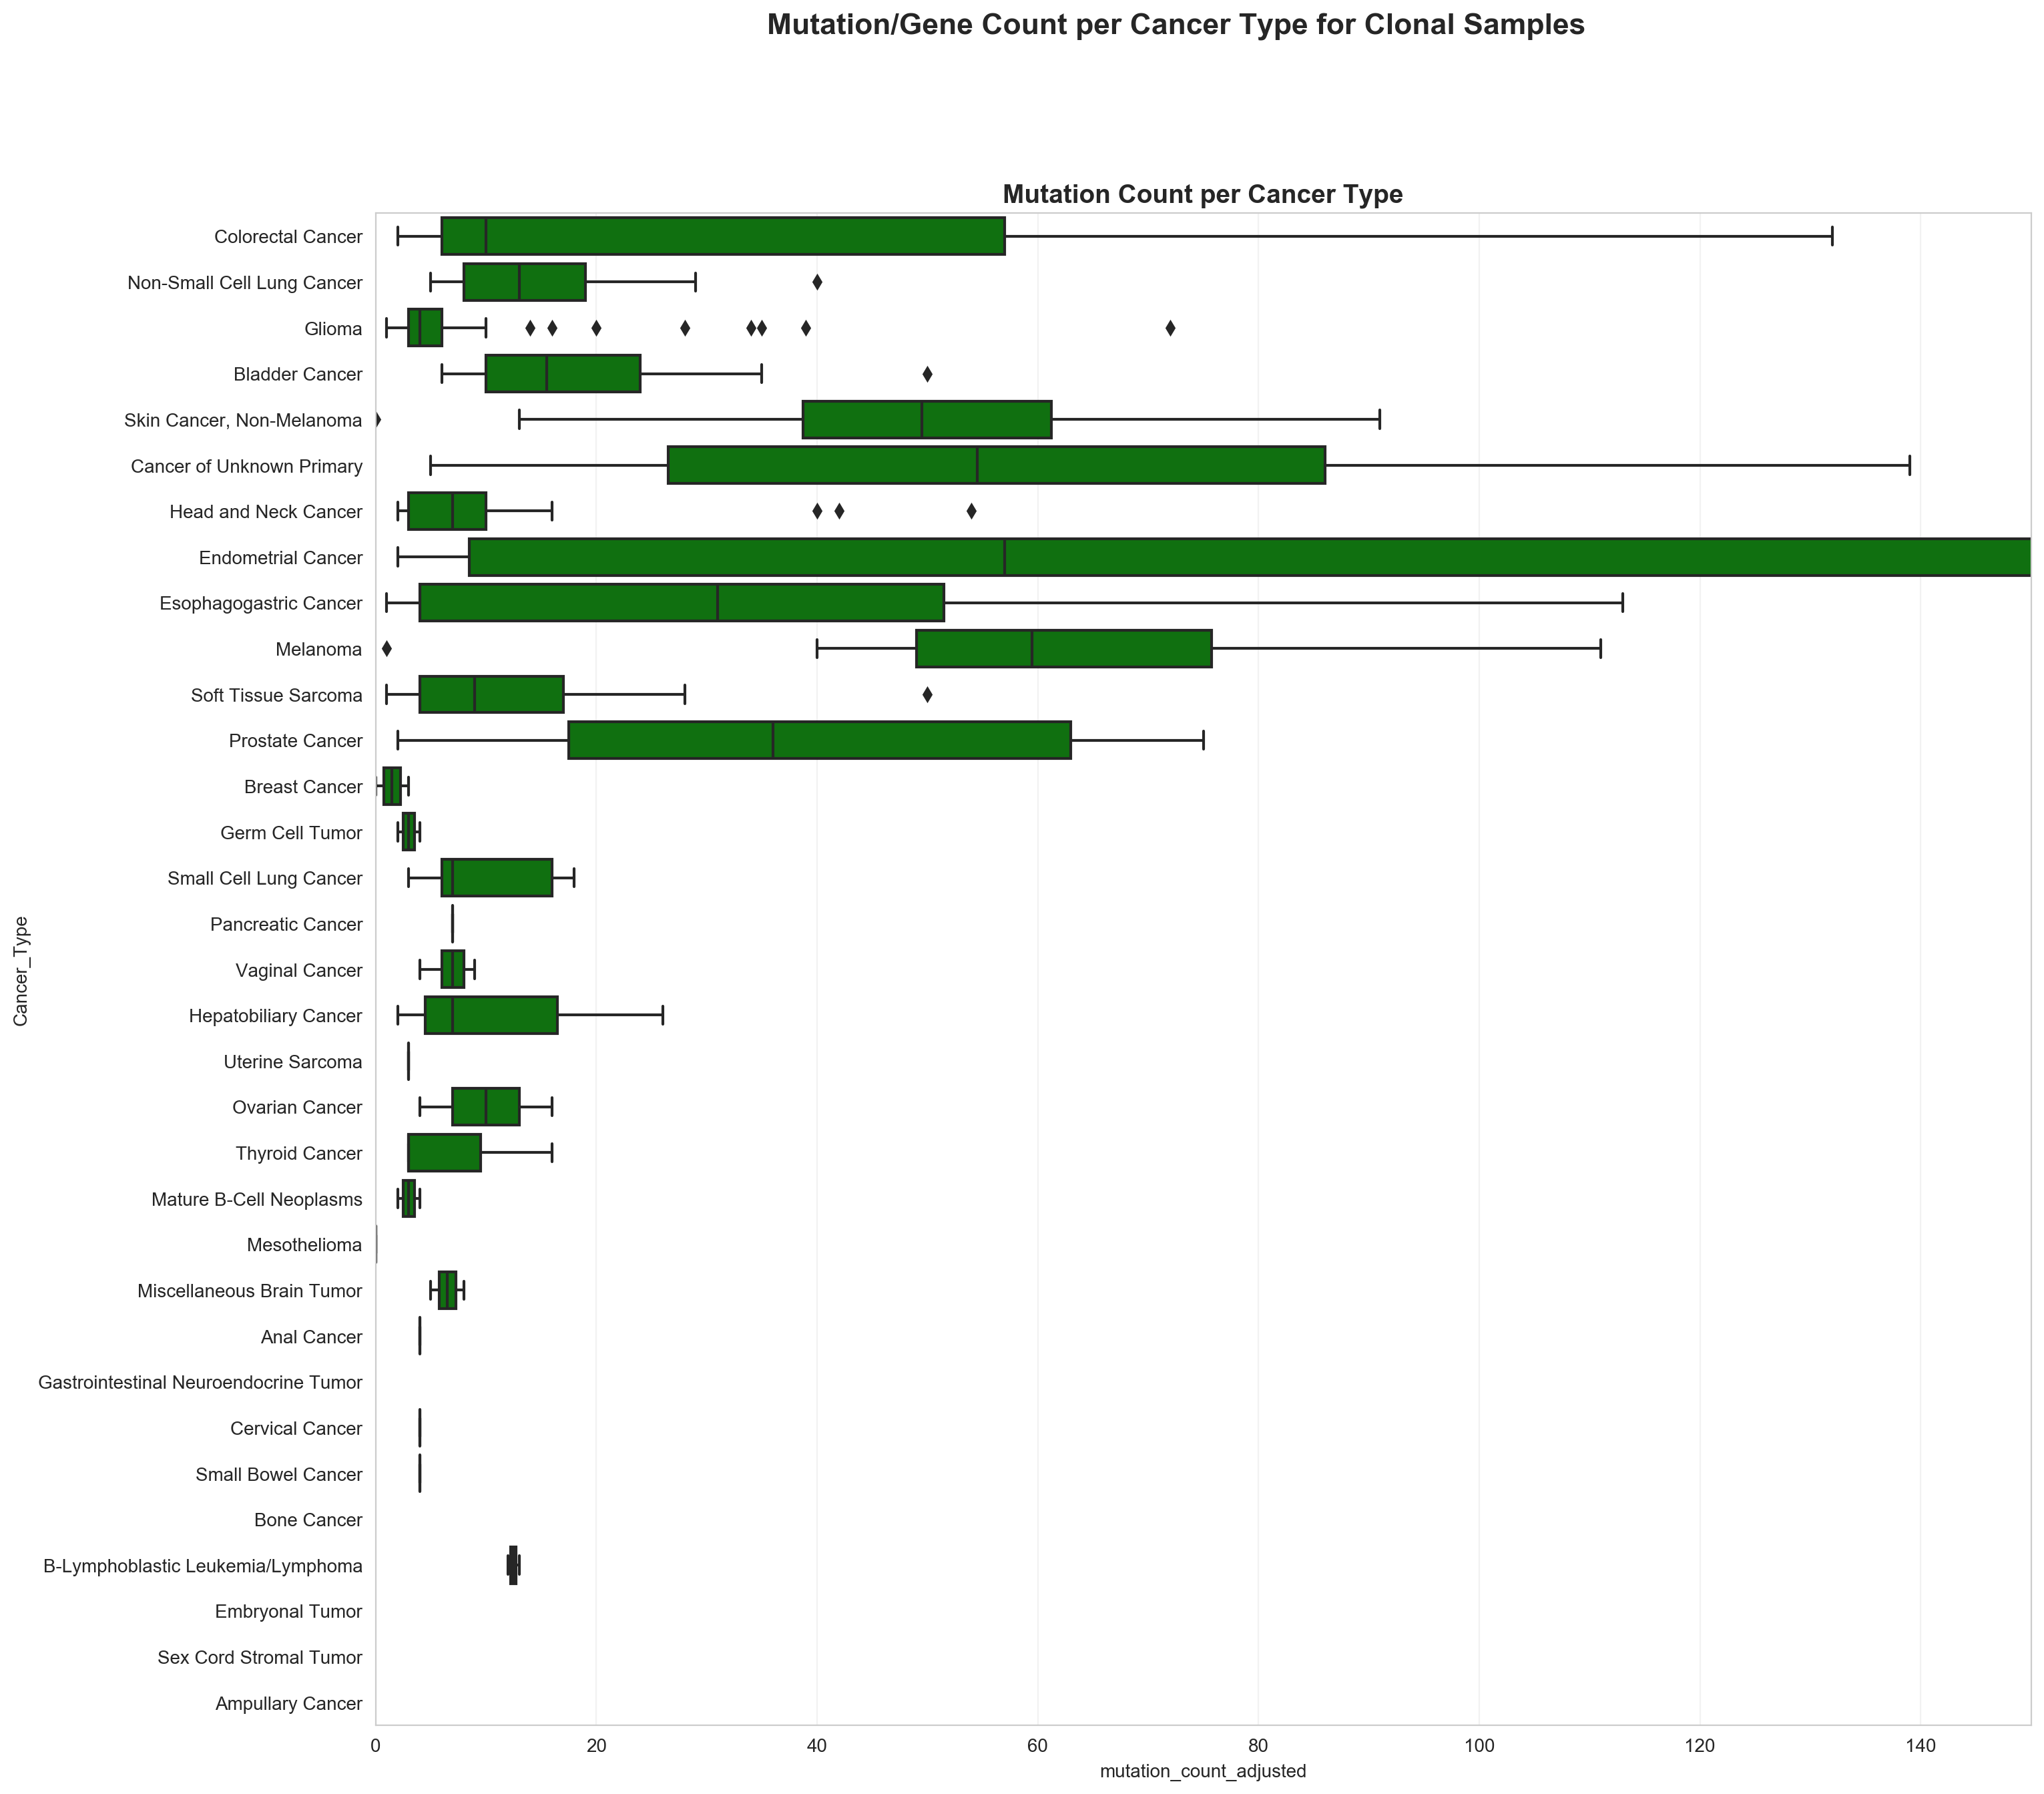

In [107]:
# For clonal Samples
fig=plt.figure(figsize=(16,15))
fig.suptitle('Mutation/Gene Count per Cancer Type for Clonal Samples', fontsize=16, weight='bold')
ax1 = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)
ax1.set_xlim(0, 150)


max_table_ccf['mutation_count_adjusted'] = max_table_ccf['mutation_count'] - max_table_ccf['tp53_count']
max_table_ccf_clonal = max_table_ccf[max_table_ccf['clonality'] == 'clonal']


sns.boxplot(y="Cancer_Type", x="mutation_count_adjusted",data=max_table_ccf_clonal,ax=ax1, dodge=False, color='green', order = count.index).set_title('Mutation Count per Cancer Type', weight='bold', fontsize=14)

Text(0.5, 1.0, 'Mutation Count per Cancer Type')

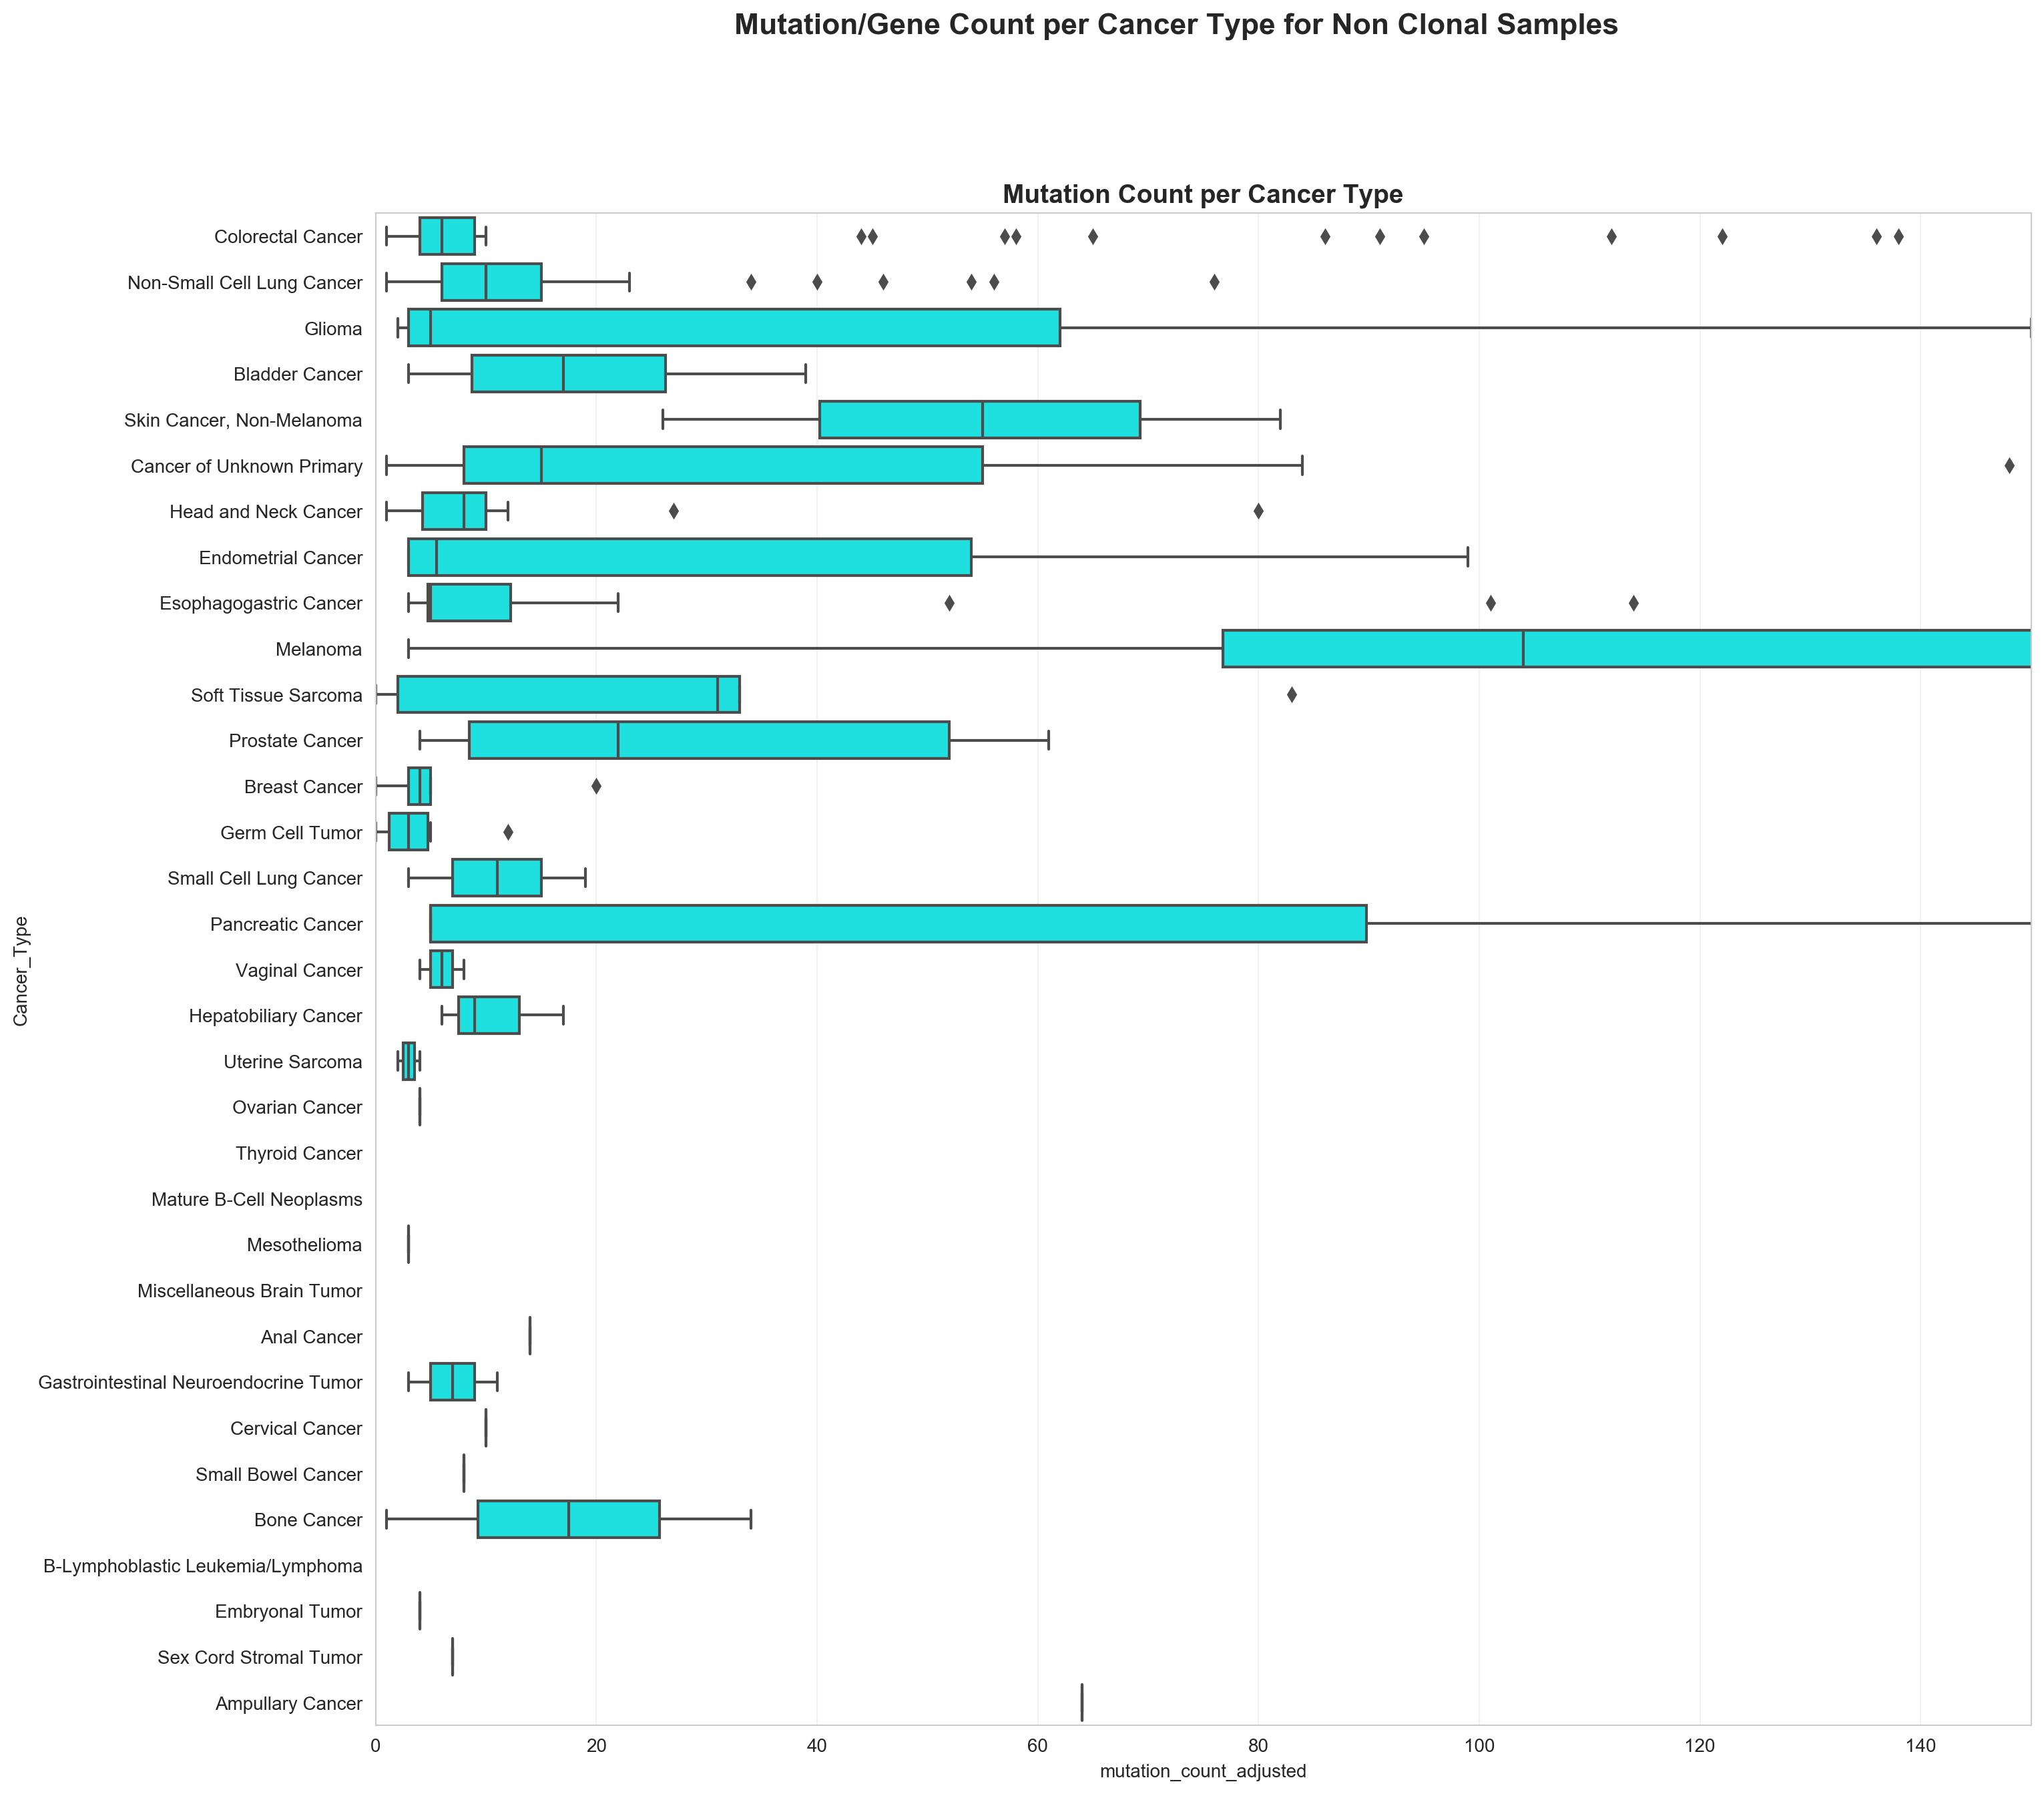

In [109]:
# For non clonal samples
fig=plt.figure(figsize=(16,15))
fig.suptitle('Mutation/Gene Count per Cancer Type for Non Clonal Samples', fontsize=16, weight='bold')
ax1 = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)
ax1.set_xlim(0, 150)

max_table_ccf_nc = max_table_ccf[max_table_ccf['clonality'].isin(['intermediate', 'subclonal'])]

sns.boxplot(y="Cancer_Type", x="mutation_count_adjusted",data=max_table_ccf_nc,ax=ax1, dodge=False, color='cyan', order = count.index).set_title('Mutation Count per Cancer Type', weight='bold', fontsize=14)

In [80]:
master_sub[master_sub['mutation_count_adjusted'] >= 60][['Tumor_Id', 'Cancer_Type', 'ccf_1','ccf_2','ccf_3', 'Sample_Type', 'mutation_count', 'gene_count', 'tp53_count']]

,Tumor_Id,Cancer_Type,ccf_1,ccf_2,ccf_3,Sample_Type,mutation_count,gene_count,tp53_count
229,P-0006754-T01-IM5,"Skin Cancer, Non-Melanoma",0.567,1.000,NaN,Metastasis,67,56.0,2
335,P-0024668-T01-IM6,Glioma,0.871,0.919,NaN,Primary,234,152.0,2
337,P-0026297-T01-IM6,Endometrial Cancer,1.000,0.915,1.000,Metastasis,449,233.0,4
700,P-0013749-T02-IM6,Pancreatic Cancer,0.539,0.968,NaN,Metastasis,120,94.0,2
832,P-0035133-T01-IM6,Prostate Cancer,1.000,0.668,0.664,Primary,539,261.0,3
1039,P-0013826-T01-IM5,Melanoma,0.665,1.000,NaN,Primary,167,116.0,2
1091,P-0009411-T01-IM5,Glioma,0.163,0.062,NaN,Primary,64,56.0,2
1323,P-0033378-T01-IM6,Melanoma,0.454,0.968,NaN,Metastasis,99,75.0,2
1327,P-0028932-T02-IM6,Esophagogastric Cancer,0.980,0.869,NaN,Metastasis,68,58.0,2
1562,P-0036435-T01-IM6,"Skin Cancer, Non-Melanoma",1.000,1.000,NaN,Primary,62,50.0,2


Now we want to create a function that 